# KNN - Classification Assignment

### importing

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### importing dataset

In [2]:
# importing
import os

# change directory
os.chdir('C:/Users/JYOTHSNA/OneDrive/BTech/Externship/Datasets')

### Data

In [3]:
df = pd.read_csv('diabetes.csv')

In [4]:
# First five rows of the dataset

df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,pos
1,8,183,64,0,0,23.3,0.672,32,pos
2,0,137,40,35,168,43.1,2.288,33,pos
3,3,78,50,32,88,31.0,0.248,26,pos
4,2,197,70,45,543,30.5,0.158,53,pos


In [5]:
# Information about the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 549 entries, 0 to 548
Data columns (total 9 columns):
Pregnancies                 549 non-null int64
Glucose                     549 non-null int64
BloodPressure               549 non-null int64
SkinThickness               549 non-null int64
Insulin                     549 non-null int64
BMI                         549 non-null float64
DiabetesPedigreeFunction    549 non-null float64
Age                         549 non-null int64
Diabetes                    549 non-null object
dtypes: float64(2), int64(6), object(1)
memory usage: 38.7+ KB


In [6]:
# Statistical Data 

df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000,549.000000
mean,3.996357,125.016393,69.506375,20.965392,84.947177,32.677778,0.495443,34.105647
std,3.514307,32.113930,20.031874,16.311651,117.003505,7.866810,0.341139,12.005768
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.085000,21.000000
25%,1.000000,101.000000,64.000000,0.000000,0.000000,27.800000,0.252000,25.000000
50%,3.000000,121.000000,72.000000,24.000000,41.000000,32.700000,0.402000,30.000000
75%,6.000000,146.000000,80.000000,33.000000,140.000000,37.200000,0.652000,41.000000
max,17.000000,199.000000,114.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [7]:
# Diabetes Values

df['Diabetes'].value_counts()

neg    281
pos    268
Name: Diabetes, dtype: int64

### Checking for any Null Values

In [8]:
df.isnull().any()

Pregnancies                 False
Glucose                     False
BloodPressure               False
SkinThickness               False
Insulin                     False
BMI                         False
DiabetesPedigreeFunction    False
Age                         False
Diabetes                    False
dtype: bool

**No null values in the data set**

### Split Dependent and Independent Variables

In [9]:
# Independent Variables

x = df.iloc[:, 0:8].values

# Dependent Variables

y = df.iloc[:, -1].values

### Categorical Data

In [10]:
# importing

from sklearn.preprocessing import LabelEncoder

# object creation

le = LabelEncoder()

In [11]:
# Encoding the data

y = le.fit_transform(y)

y

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,

### Data Visualization

In [12]:
df.drop(['Diabetes'], axis = 1, inplace = True)

In [13]:
df['Diabetes'] = y

In [14]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Diabetes
0,6,148,72,35,0,33.6,0.627,50,1
1,8,183,64,0,0,23.3,0.672,32,1
2,0,137,40,35,168,43.1,2.288,33,1
3,3,78,50,32,88,31.0,0.248,26,1
4,2,197,70,45,543,30.5,0.158,53,1


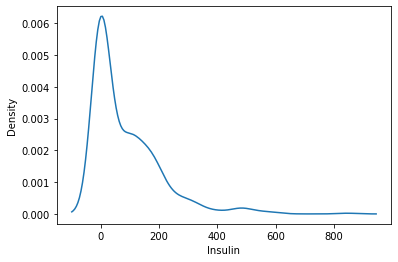

In [15]:
sns.kdeplot(x = df['Insulin'])

        - Most values of Insulin are between 0 t0 200

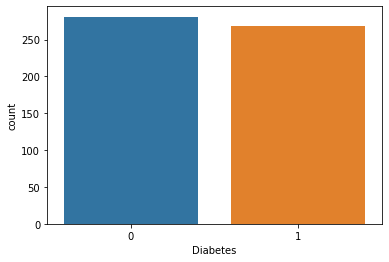

In [16]:
sns.countplot(x = df['Diabetes'])

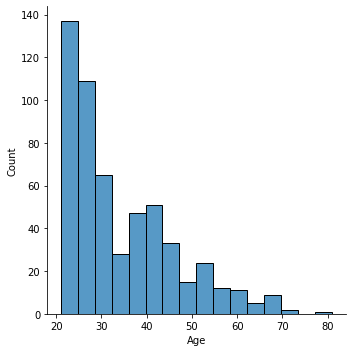

In [17]:
sns.displot(x = df['Age'])

            - Maximum Women are in between 20 - 35 in Age

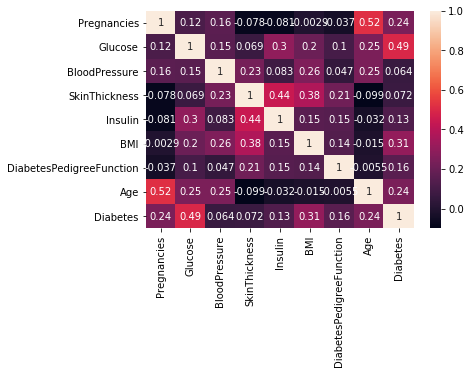

In [18]:
sns.heatmap(df.corr(), annot = True)

        - In the above plot, all the independent variables are "positively" correlated with Diabetes.

### Feature Scaling  

In [19]:
# importing

from sklearn.preprocessing import StandardScaler

# object creation

ss = StandardScaler()

In [20]:
# Scaling the variables

x = ss.fit_transform(x)

### Split Train and Test Data

In [21]:
# importing

from sklearn.model_selection import train_test_split

# training and testing data
# 70% - training, 30% - testing

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

### Building the Model

In [22]:
# importing

from sklearn.neighbors import KNeighborsClassifier

In [23]:
# object creation

# considering 5 neighbours

knn = KNeighborsClassifier(n_neighbors = 5)

In [24]:
# Training the Model

knn.fit(x_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

### Predicting the Output

In [25]:
ypred = knn.predict(x_test)

In [26]:
ypred      # predicted values

array([1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0])

In [27]:
y_test     # actual values

array([1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0])

### Accuracy of the Model

In [28]:
# importing

from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [29]:
# finding the accuracy

accuracy = accuracy_score(y_test, ypred)

In [30]:
accuracy

0.7212121212121212

In [31]:
# Confusion Matrix

confusion_matrix(y_test, ypred)

array([[64, 27],
       [19, 55]], dtype=int64)

In [32]:
# Classification Reports

print(classification_report(y_test, ypred))

              precision    recall  f1-score   support

           0       0.77      0.70      0.74        91
           1       0.67      0.74      0.71        74

    accuracy                           0.72       165
   macro avg       0.72      0.72      0.72       165
weighted avg       0.73      0.72      0.72       165



## ROC plot

In [33]:
# Create ROC curve for the model
import sklearn.metrics as metrics


probs = knn.predict_proba(x_test)

# print(probs)

preds = probs[:,1]

# print(preds)

# calculate the fpr and tpr for all thresholds of the classification
fpr, tpr, threshold = metrics.roc_curve(y_test, preds)
roc_auc = metrics.auc(fpr, tpr)

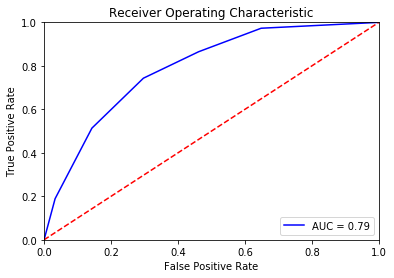

In [34]:
# PLOT ROC curve

plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()

--------------------------------------------



-------------------------------------------------------------